# Session 5: Supervised Learning: 

# Classification with k-NN and Decision Trees

## Zainab Nazari


We will cover two popular classification algorithms:
- **k-Nearest Neighbors (k-NN)**
- **Decision Trees**

At the end, you will have hands-on practice with exercises.

## Learning Goals
By the end of this lesson, you should be able to:
- Understand the intuition behind k-NN and Decision Trees
- Train and test these models using scikit-learn
- Compare their performance
- Solve small classification problems with Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

## Part 1: k-Nearest Neighbors (k-NN)
The idea behind k-NN is simple:
- To classify a new point, look at the **k closest data points** in the training set.
- Assign the most common class among those neighbors.

It is a **lazy learning** algorithm (no explicit training phase).

In [3]:
# Example with Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # first two features for visualization
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


Let's visualize the decision boundaries for k-NN.

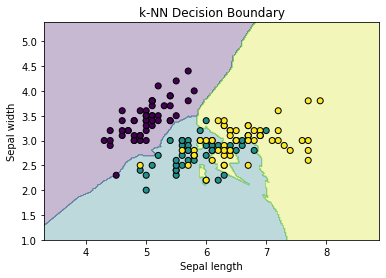

In [4]:
# Decision boundary visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('k-NN Decision Boundary')
plt.show()

## Part 2: Decision Trees
Decision Trees classify data by asking a sequence of **questions** about features.
- Each internal node represents a decision rule.
- Each leaf node represents a class.

Advantages:
- Easy to interpret
- Can handle numerical and categorical data

Disadvantages:
- Can overfit if not pruned

Accuracy: 0.7555555555555555


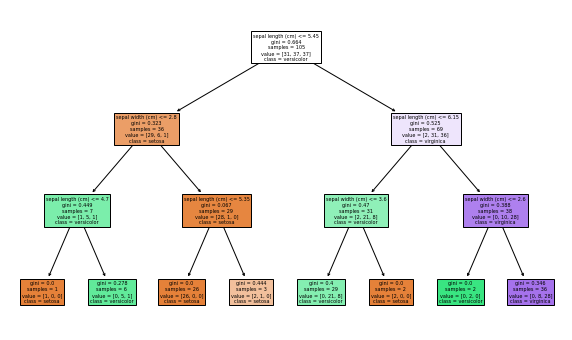

In [5]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_dt))

plt.figure(figsize=(10,6))
plot_tree(dt, feature_names=iris.feature_names[:2], class_names=iris.target_names, filled=True)
plt.show()

## Exercises (30 minutes)

1. **Play with k in k-NN:** Try different values of `k` (1, 3, 7, 15). How does accuracy change?
2. **Use all 4 features:** Train both k-NN and Decision Tree on the full Iris dataset (not just 2 features). Compare results.
3. **New dataset:** Generate a synthetic dataset using `make_classification` with 2 classes and 2 features. Train both classifiers and compare performance.
4. **Decision Tree depth:** Try different values of `max_depth` (None, 2, 5, 10). What happens?
5. **Challenge:** Use `classification_report` to compare precision, recall, and F1-score between k-NN and Decision Tree.

Discuss results with a partner or write down your conclusions.